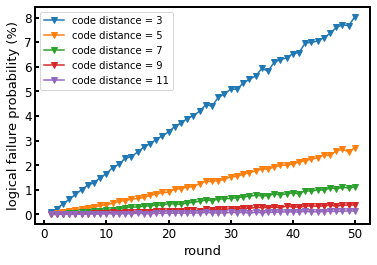

In [11]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

################ 要変更 #################
# ファイル名
file = "p=0.5% ,eta=1000, d=11, round=(1,50,1) , # of trials=100000" + ".csv"
########################################

# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/repetition"

# csvファイルの読み込み
os.chdir(path)
data = pd.read_csv(file, index_col=0)

# データフレームの行名(リスト)を取得
#ind = data.index

# データフレームの列名(リスト)を取得
code_distance_list = data.columns



##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)

for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][1::2]*100,marker='v',label="code distance = "+str(code_distance))

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

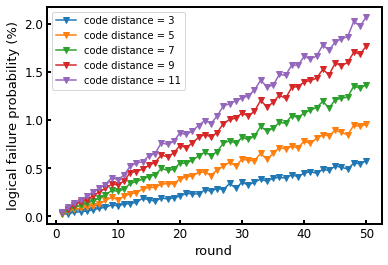

In [12]:
##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)

for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][::2]*100,marker='v',label="code distance = "+str(code_distance))

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
plt.legend()
plt.show()

## フィッティング

In [101]:
def logical_error_list(p,round_list):
    return 1/2 * (1-(1-2*p)**round_list)

def dif_loss_fun(data_list,logical_error_list,p,round_list):
    answer = 0
    data_list = np.array(data_list)
    for num in round_list:
        answer += num * (1-2*p)**(num-1) * (data_list[num-1] - logical_error_list[num-1])
    return answer

def fit(data_list,initial_p,round_list,trials,alpha):
    # trials：試行回数
    # alpha：学習率
    p = initial_p # pの初期値
    data_list = np.array(data_list)
    # ロス関数
    #for i in round_list:
        #loss_fun = 1/2 * np.sum((data_list - logical_error_list(p,np.arange(1,round_list,1)))**2)
    for trial in range(trials):
        # pの更新
        p = p + alpha * dif_loss_fun(data_list,logical_error_list(p,round_list),p,round_list)
        loss_fun = 1/2 * np.sum((data_list - logical_error_list(p,round_list))**2)
        #print(p, loss_fun)
    return p

0.00174445284677083


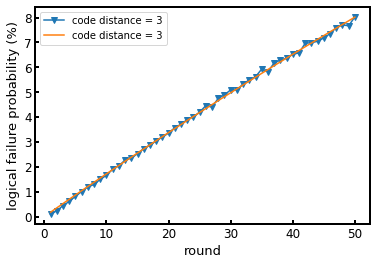

In [102]:
code_distance = 3

# フィッティング
initial_p = 0.0001
round_list = np.arange(1,51,1)
trials = 5000
alpha = 0.00002
fin_p = fit(data["3"][1::2],initial_p,round_list,trials,alpha)
print(fin_p)

##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)
ax.plot(round_list, data["3"][1::2]*100,marker='v',label="code distance = "+str(code_distance))
ax.plot(round_list, logical_error_list(fin_p,round_list)*100,marker='',label="code distance = "+str(code_distance))

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

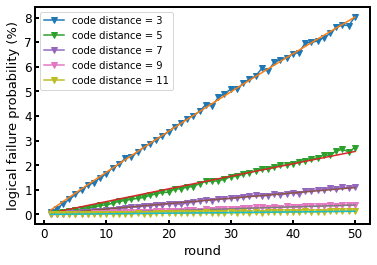

In [104]:
##### グラフ作成 #####

plt.rcParams["xtick.direction"] = "in"     
plt.rcParams["ytick.direction"] = "in" 
fig, ax = plt.subplots()
round_list = np.arange(1,51,1)

ss = 0
for code_distance in code_distance_list:
    ax.plot(round_list, data[code_distance][1::2]*100,marker='v',label="code distance = "+str(code_distance))
    # フィッティング
    initial_p = 0.0001
    round = 50
    trials = 5000
    alpha = 0.00002
    fin_p = fit(data[code_distance][1::2],initial_p,round_list,trials,alpha)
    ax.plot(round_list,logical_error_list(fin_p,round_list)*100,marker='')
    ss += 1
    if ss == 5:
        break

ax.set_xticks(np.arange(0,51,10))
ax.set_xlabel("round", fontsize=13)
ax.set_ylabel("logical failure probability (%)", fontsize=13)
#ax.set_xlim(9,11)
#ax.set_ylim(12,17)
ax.spines["top"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.tick_params(direction="in", width=2, length=4, labelsize=12)
#ax.set_title("X,p=(0.0001,0.0009,0.0001),d=(3,9,2),d(rep)=5,eta=1000,trials=10000", fontsize=14)
plt.legend()
plt.show()

In [60]:
p=0.001
round_list = np.arange(1,51,1)
logical_error = logical_error_list(p,round_list)
print(np.array(data["3"][1::2]))
print(logical_error)
a = dif_loss_fun(data["3"][1::2],logical_error,p,round_list)
print()
print(a)

[0.00086 0.00235 0.00437 0.00608 0.00811 0.01003 0.01191 0.0129  0.01496
 0.01656 0.01905 0.02036 0.02274 0.02349 0.0253  0.02733 0.02871 0.03042
 0.03196 0.03355 0.03572 0.03711 0.03896 0.04011 0.04198 0.04458 0.04404
 0.04752 0.04893 0.05092 0.05084 0.05331 0.05492 0.05617 0.05931 0.05823
 0.06178 0.06288 0.06362 0.06531 0.06574 0.06967 0.06989 0.07045 0.07182
 0.07353 0.07596 0.07703 0.07669 0.08032]
[0.001      0.001998   0.002994   0.00398802 0.00498004 0.00597008
 0.00695814 0.00794422 0.00892833 0.00991048 0.01089066 0.01186888
 0.01284514 0.01381945 0.01479181 0.01576223 0.0167307  0.01769724
 0.01866185 0.01962452 0.02058527 0.0215441  0.02250101 0.02345601
 0.0244091  0.02536028 0.02630956 0.02725694 0.02820243 0.02914602
 0.03008773 0.03102756 0.0319655  0.03290157 0.03383577 0.03476809
 0.03569856 0.03662716 0.03755391 0.0384788  0.03940184 0.04032304
 0.04124239 0.04215991 0.04307559 0.04398944 0.04490146 0.04581165
 0.04672003 0.04762659]

26.852027723483992


In [18]:
print(np.arange(1,round,1))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51]


In [41]:
print(logical_error_list(0.01,np.arange(1,round,1)))

TypeError: 'numpy.ndarray' object is not callable